In [315]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from scipy import stats
from scipy.stats import zscore

In [316]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/titanic_dataset.csv'
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [317]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

In [318]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [319]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [320]:
null_values = df.isnull().sum()
null_values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

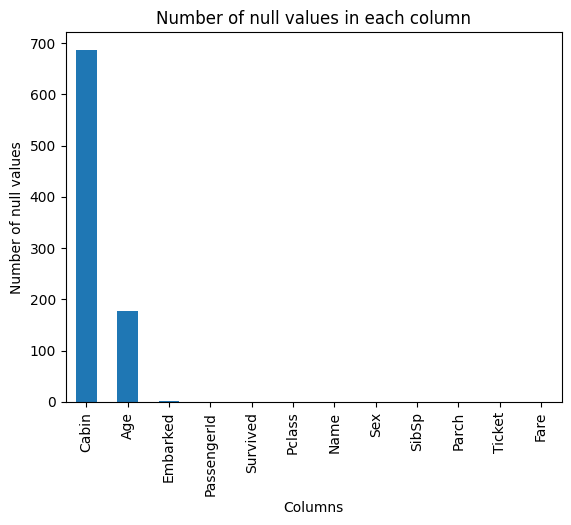

In [321]:
null_values.sort_values(ascending = False).plot(kind='bar')
plt.title('Number of null values in each column')
plt.xlabel('Columns')
plt.ylabel('Number of null values')
plt.show()

<ipython-input-322-13c240332d67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette=palette)


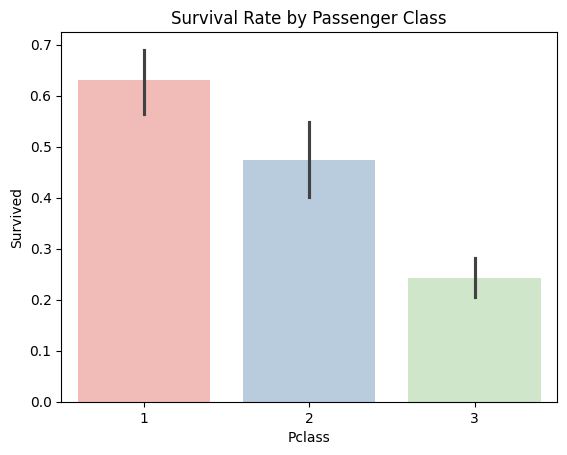

In [322]:
palette = sns.color_palette("Pastel1", 3)
sns.barplot(x='Pclass', y='Survived', data=df, palette=palette)
plt.title('Survival Rate by Passenger Class')
plt.show()


<ipython-input-323-6881ac6ae23e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette=palette)


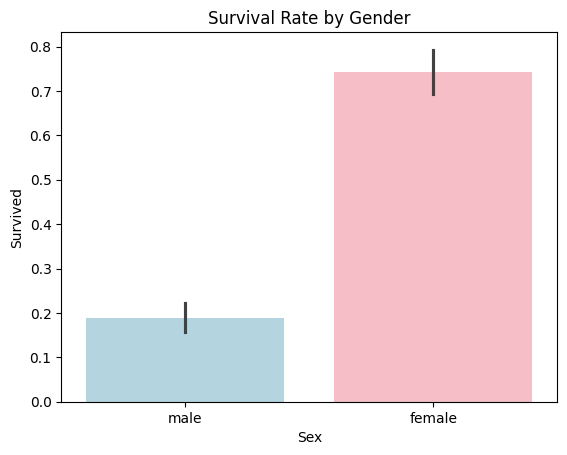

In [323]:
palette = {'male': 'lightblue', 'female': 'lightpink'}
sns.barplot(x='Sex', y='Survived', data=df, palette=palette)
plt.title('Survival Rate by Gender')
plt.show()

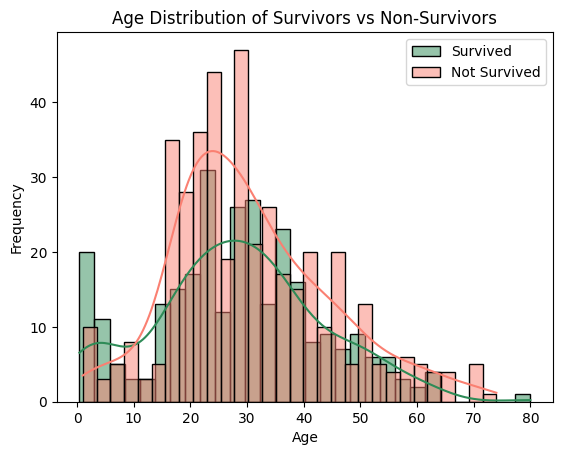

In [324]:
sns.histplot(data=df[df['Survived'] == 1]['Age'], color='seagreen', label='Survived', kde=True, bins=30, alpha=0.5)
sns.histplot(data=df[df['Survived'] == 0]['Age'], color='salmon', label='Not Survived', kde=True, bins=30, alpha=0.5)

# Add titles and legend
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

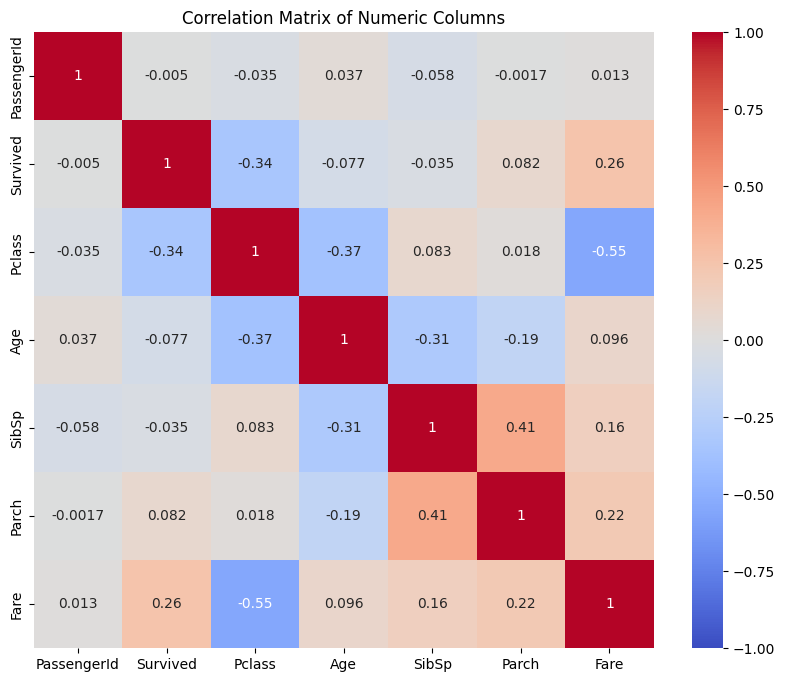

In [325]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


# Data Cleaning

In [326]:
'''Extract some info from the cabin and drop it'''
df['Deck'] = df['Cabin'].str[0]
df['Deck'].fillna('Unknown', inplace=True)
df.drop(columns=['Cabin'], inplace=True)


In [327]:
'''make them to groups to avoid problems from nulls and then label encode them'''
age_bins = [0, 12, 18, 35, 60, 80]
age_labels = ['Infant', 'Child', 'Teen', 'Young Adult', 'Adult']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df['AgeGroup'] = pd.Categorical(df['AgeGroup'], categories=age_labels + ['Unknown'])
df['AgeGroup'].fillna('Unknown', inplace=True)
print(df[['Age', 'AgeGroup']].head(10))


    Age     AgeGroup
0  22.0         Teen
1  38.0  Young Adult
2  26.0         Teen
3  35.0  Young Adult
4  35.0  Young Adult
5   NaN      Unknown
6  54.0  Young Adult
7   2.0       Infant
8  27.0         Teen
9  14.0        Child


In [328]:
df.drop(columns = "Age", inplace = True)

In [329]:
'''fill with the mode as they are two few nulls'''
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

In [330]:
numeric_columns = df.select_dtypes(include=['number'])
z_scores = stats.zscore(numeric_columns)
threshold = 3
filtered_data = df[(z_scores < threshold).all(axis=1)]
outliers_removed = len(df) - len(filtered_data)
df = filtered_data
print("Number of outliers removed:", outliers_removed)


Number of outliers removed: 64


# Feature Engineering - Selection

In [331]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Deck', 'AgeGroup'],
      dtype='object')

In [332]:
'''already encoded'''
df["Survived"].unique()

array([0, 1])

In [333]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

<ipython-input-333-583e0574c024>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [334]:
''' PassengerId will not give me additional info as it is unique for all the rows
I have done other operations on  "Ticket", "Name", "SibSp", "Parch"'''

df.drop(columns = ["PassengerId", "Ticket", "Name", "SibSp", "Parch"], inplace = True)

<ipython-input-334-cbc69cf5374b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ["PassengerId", "Ticket", "Name", "SibSp", "Parch"], inplace = True)


In [335]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Deck', 'AgeGroup',
       'FamilySize'],
      dtype='object')

In [336]:
''' On-hot Encoding '''
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Deck', 'AgeGroup'])


In [337]:
label_encoder = LabelEncoder()

df['Pclass_encoded'] = label_encoder.fit_transform(df['Pclass'])


In [338]:
scaler = MinMaxScaler()
numerical_features = ['Fare']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [339]:
df.head()

,Survived,Pclass,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,...,Deck_G,Deck_T,Deck_Unknown,AgeGroup_Infant,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Unknown,Pclass_encoded
0,0,3,0.043975,2,False,True,False,False,True,False,...,False,False,True,False,False,True,False,False,False,2
1,1,1,0.432369,2,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,0
2,1,3,0.048069,1,True,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,2
3,1,1,0.322078,2,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,0
4,0,3,0.048827,1,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,False,2


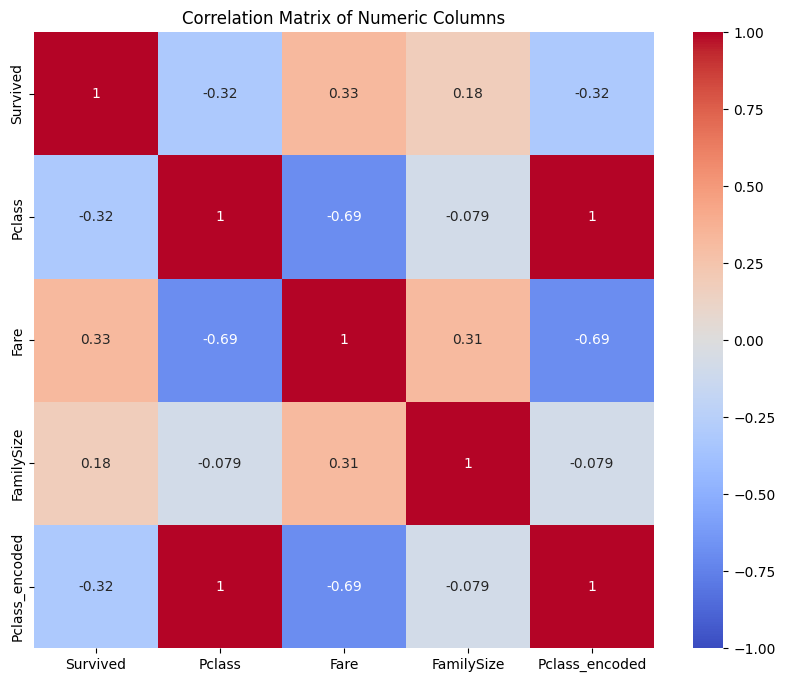

In [340]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


# Machine Learning Models

In [341]:
X = df.drop(columns = "Survived")
y = df["Survived"]

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [343]:
X_train.describe()

,Pclass,Fare,FamilySize,Pclass_encoded
count,661.000000,661.000000,661.000000,661.000000
mean,2.307110,0.160969,1.623298,1.307110
std,0.828157,0.185687,0.956003,0.828157
min,1.000000,0.000000,1.000000,0.000000
25%,2.000000,0.047892,1.000000,1.000000
50%,3.000000,0.078852,1.000000,2.000000
75%,3.000000,0.168141,2.000000,2.000000
max,3.000000,1.000000,6.000000,2.000000


The Best one is CategoricalNB as the data is binary and is not continous.

## GaussianNB

In [344]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)

Gaussian Naive Bayes Accuracy: 0.7289156626506024


## MultinomialNB

In [345]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
mnb_accuracy = accuracy_score(y_test, mnb_pred)
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)

Multinomial Naive Bayes Accuracy: 0.7650602409638554


## CategoricalNB

In [346]:
cnb = CategoricalNB()
cnb.fit(X_train, y_train)
cnb_pred = cnb.predict(X_test)
cnb_accuracy = accuracy_score(y_test, cnb_pred)
print("Categorical Naive Bayes Accuracy:", cnb_accuracy)


Categorical Naive Bayes Accuracy: 0.8012048192771084


In [347]:
def calc(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)
  precision = precision_score(y_test, y_pred, average='weighted')
  print("Precision:", precision)
  recall = recall_score(y_test, y_pred, average='weighted')
  print("Recall:", recall)
  f1 = f1_score(y_test, y_pred, average='weighted')
  print("F1-score:", f1)
  conf_matrix = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  plt.figure(figsize=(6, 4))
  sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.tight_layout()
  plt.show()

Accuracy: 0.8132530120481928
Precision: 0.8128171482579212
Recall: 0.8132530120481928
F1-score: 0.8130047820311667
Confusion Matrix:


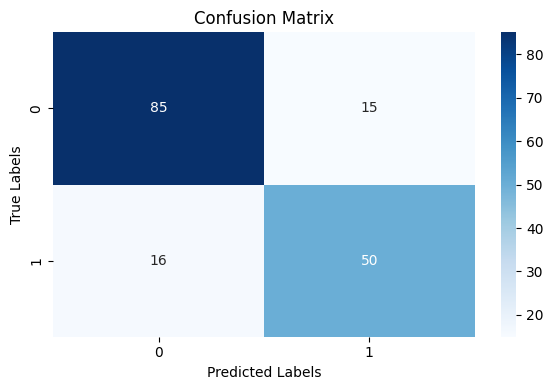

Cross-Validation Accuracy: 0.7980503833515881
Cross-Validation Standard Deviation of Accuracy: 0.006608456928491862


In [348]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
calc(y_test, y_pred)
cv_accuracy = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_accuracy.mean())
print("Cross-Validation Standard Deviation of Accuracy:", cv_accuracy.std())


# KNN

Accuracy: 0.8192771084337349
Precision: 0.8181859513525802
Recall: 0.8192771084337349
F1-score: 0.8176060692144445
Confusion Matrix:


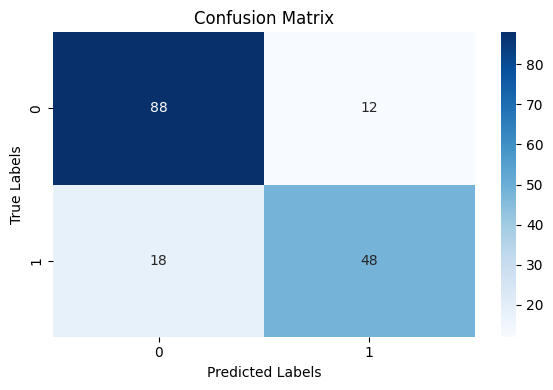

Cross-Validation Accuracy: 0.8101569916027748
Cross-Validation Standard Deviation of Accuracy: 0.009814908924017754


In [349]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
calc(y_test, predictions)
cv_accuracy = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_accuracy.mean())
print("Cross-Validation Standard Deviation of Accuracy:", cv_accuracy.std())

#SVM

Accuracy: 0.8433734939759037
Precision: 0.8425737690214953
Recall: 0.8433734939759037
F1-score: 0.8424617587999055
Confusion Matrix:


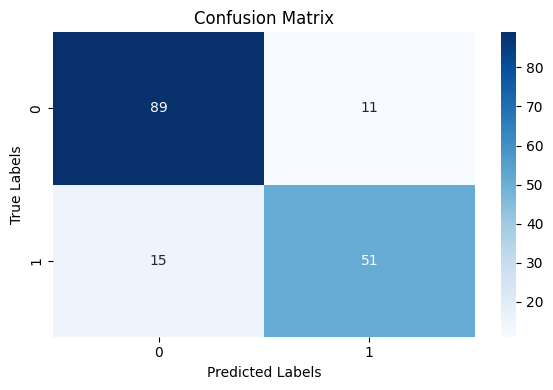

In [350]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
calc(y_test, y_pred)


# Neural Netwroks

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7951807228915663
Precision: 0.7937497114896367
Recall: 0.7951807228915663
F1-score: 0.7925124816885408
Confusion Matrix:


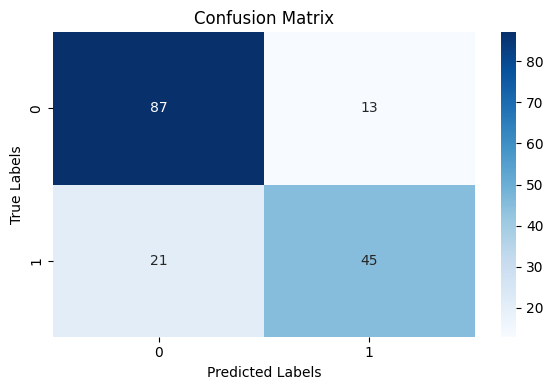

In [351]:
nn = MLPClassifier()
nn.fit(X_train, y_train)
y_pred=nn.predict(X_test)
calc(y_test, y_pred)

Accuracy: 0.8012048192771084
Precision: 0.7997422947057551
Recall: 0.8012048192771084
F1-score: 0.7997158597902266
Confusion Matrix:


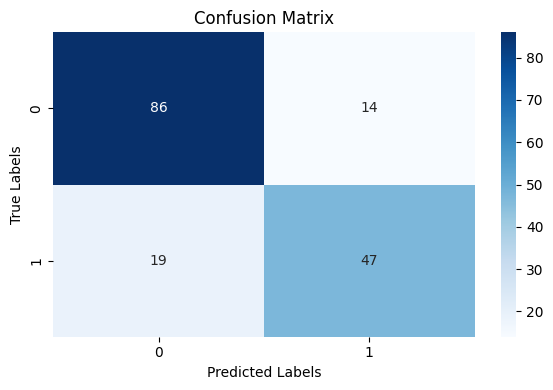

In [352]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
calc(y_test, y_pred)

Accuracy: 0.7891566265060241
Precision: 0.7886546949412271
Recall: 0.7891566265060241
F1-score: 0.7888763668093817
Confusion Matrix:


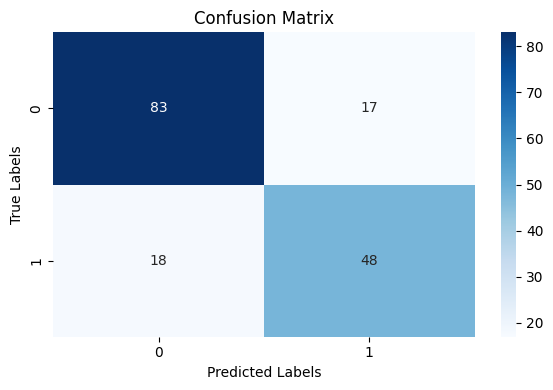

In [353]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
calc(y_test, y_pred)
